### 1번 문제
> For문을 이용하여 구구단을 출력하라
    2단부터 9단까지 구구단을 print를 이용하여 출력하라.

In [8]:
for i in range (2,9) :
    print(f'===== {i}단 =====')
    for j in range (1,10) :
        print(f'{i} * {j} = {i * j}')
    

===== 2단 =====
2 * 1 = 2
2 * 2 = 4
2 * 3 = 6
2 * 4 = 8
2 * 5 = 10
2 * 6 = 12
2 * 7 = 14
2 * 8 = 16
2 * 9 = 18
===== 3단 =====
3 * 1 = 3
3 * 2 = 6
3 * 3 = 9
3 * 4 = 12
3 * 5 = 15
3 * 6 = 18
3 * 7 = 21
3 * 8 = 24
3 * 9 = 27
===== 4단 =====
4 * 1 = 4
4 * 2 = 8
4 * 3 = 12
4 * 4 = 16
4 * 5 = 20
4 * 6 = 24
4 * 7 = 28
4 * 8 = 32
4 * 9 = 36
===== 5단 =====
5 * 1 = 5
5 * 2 = 10
5 * 3 = 15
5 * 4 = 20
5 * 5 = 25
5 * 6 = 30
5 * 7 = 35
5 * 8 = 40
5 * 9 = 45
===== 6단 =====
6 * 1 = 6
6 * 2 = 12
6 * 3 = 18
6 * 4 = 24
6 * 5 = 30
6 * 6 = 36
6 * 7 = 42
6 * 8 = 48
6 * 9 = 54
===== 7단 =====
7 * 1 = 7
7 * 2 = 14
7 * 3 = 21
7 * 4 = 28
7 * 5 = 35
7 * 6 = 42
7 * 7 = 49
7 * 8 = 56
7 * 9 = 63
===== 8단 =====
8 * 1 = 8
8 * 2 = 16
8 * 3 = 24
8 * 4 = 32
8 * 5 = 40
8 * 6 = 48
8 * 7 = 56
8 * 8 = 64
8 * 9 = 72


### 2번 문제
> 2부터 50까지 소수를 리스트의 형태로 출력하시오
1. 첫번째 반복문에서는 2부터 50까지 반복을 하는 반복문을 구성하시오
2. 소수는 1과 자기 자신 외에는 나누어지지 않는 수이다 
3. 반복문 안에 bool의 형태의 데이터를 만들어서 True라 지정한다. 
4. 두번째 반복문을 이용하여 2부터 시작하여 (자기 자신 -1)까지 나누어 나머지 값이 0이면 3번 과정에서 만든 변수를 False로 변경한다.
5. bool 형태의 변수를 조건문을 사용하여 True인 경우 리스트에 추가한다.

In [12]:
for i in range(2,51) :
    check = True
    for j in range(2, i) :
        if (i % j == 0) :
            check = False
            break
    if check :
        print(i, end=' ')

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 

### 3번 문제
> Pandas를 이용하여 다음과 같은 데이터프레임을 만들고 데이터프레임을 수정하라.

|   | 0 | 1 |  2 |
|:-:|:-:|:-:|:--:|
| 0 | 1 | 2 |  3 |
| 1 | 7 | 8 |  9 |
| 2 | 4 | 5 |  6 |
| 3 | 3 | 5 | 10 |

1. 컬럼의 이름을 A, B, C로 변경
2. D라는 새로운 컬럼에 shift 함수를 이용하여 C 컬럼의 차를 D 컬럼에 생성(NaN값인 경우에는 0으로 대체)
3. A 컬럼을 기준으로 오름차순 정렬
4. 인덱스의 값을 새로 지정(기존의 인덱스는 삭제)
5. 이 모든 과정은 원본의 데이터를 수정 

In [38]:
import pandas as pd
data = [[1,2,3],
        [7,8,9],
        [4,5,6],
        [3,5,10]]

col = [0,1,2]
df = pd.DataFrame(data,columns=col)

df.columns = ['A','B','C']
df['D'] = df['C'] - df['C'].shift()
df['D'] = df['D'].fillna(0)
df = df.sort_values(by='A')
df = df.reset_index(drop=True)

df


,A,B,C,D
0,1,2,3,0.0
1,3,5,10,4.0
2,4,5,6,-3.0
3,7,8,9,6.0


### 4번 문제
> 2014,2015,2016 csv파일을 로드하여 데이터를 수정하라.

1. 3개의 데이터프레임을 결합하시오 (유니언 결합)
2. 구분 컬럼의 값을 datetime의 형태로 변환하라. 
3. 구분 컬럼에서 년도만 따로 출력하여 파생변수 년도를 생성하라.
4. 년도 별 평균 사망자, 총 사망자를 출력하라. 
5. 년도 별 사고 대비 사망율( 사망(명) / 사고(건))을 출력하라.

In [77]:
import pandas as pd
from datetime import datetime

df_2014 = pd.read_csv('csv/2014.csv', encoding='CP949')
df_2015 = pd.read_csv('csv/2015.csv', encoding='CP949')
df_2016 = pd.read_csv('csv/2016.csv', encoding='CP949')

df = pd.concat(
    [df_2014, df_2015, df_2016],
    axis=0,
    ignore_index=True
)

if '구분' in df.columns :
    df.set_index('구분', inplace=True)

df.index = pd.to_datetime(df.index, format='%Y년%m월')
df['연도'] = df.index.year

dead2014 = df.loc['2014', '사망(명)'].sum()
dead2015 = df.loc['2015', '사망(명)'].sum()
dead2016 = df.loc['2016', '사망(명)'].sum()

print(f'=== 연도별 총 사망자 수 ===\n2014년 : {dead2014}\n2015년 : {dead2015}\n2016년 : {dead2016}')
print()

deadmean_2014 = df.loc['2014', '사망(명)'].mean()
deadmean_2015 = df.loc['2015', '사망(명)'].mean()
deadmean_2016 = df.loc['2016', '사망(명)'].mean()

print(f'=== 연도별 평균 사망자 수 ===\n2014년 : {round(deadmean_2014,2)}\n2015년 : {round(deadmean_2015,2)}\n2016년 : {round(deadmean_2016,2)}')
print()

accidentCnt_2014 = df.loc['2014', '사고(건)'].sum()
accidentCnt_2015 = df.loc['2015', '사고(건)'].sum()
accidentCnt_2016 = df.loc['2016', '사고(건)'].sum()

accidentPct_2014 = dead2014 / accidentCnt_2014
accidentPct_2015 = dead2015 / accidentCnt_2015
accidentPct_2016 = dead2016 / accidentCnt_2016

print(f'=== 연도별 사고 대비 사망률 ===\n2014년 : {round(accidentPct_2014,2)}\n2015년 : {round(accidentPct_2015,2)}\n2016년 : {round(accidentPct_2016,2)}')


=== 연도별 총 사망자 수 ===
2014년 : 130
2015년 : 108
2016년 : 98

=== 연도별 평균 사망자 수 ===
2014년 : 10.83
2015년 : 9.0
2016년 : 8.17

=== 연도별 사고 대비 사망률 ===
2014년 : 0.05
2015년 : 0.04
2016년 : 0.04


### 5번 문제
> 세종시.csv 파일을 pandas를 이용하여 read 후 데이터프레임을 수정하라.

1. pandas를 이용하여 csv 파일을 로드한다. (주소는 상대경로로 지정)
2. "법정동코드", "특수지구분코드", "특수지구분명", "공동주택코드", "특수지명" 컬럼을 삭제한다. 
3. "기준연월" 파생변수를 생성하여 "기준연도" + "기준월" 데이터를 삽입한다. 
4. pivot_table을 이용하여 인덱스는 "기준연월" 컬럼은 "공동주택구분명" 벨류는 "공시가격"으로 평균값을 구하고 결측치의 값은 0으로 한 뒤 바형 그래프로 출력한다. 
5. 한글이 포함되어 있음으로 한글을 표시가 될수 있도록 폰트를 변경하여 시각화를 한다.

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_13699/3761955990.py:6: DtypeWarning: Columns (5,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('csv/세종시.csv', encoding='CP949')
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_13699/3761955990.py:15: FutureWarning: The provided callable <function mean at 0x10c0fbf60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, index='기준연월', columns='공동주택구분명', values='공시가격', aggfunc=np.mean, fill_value=0)


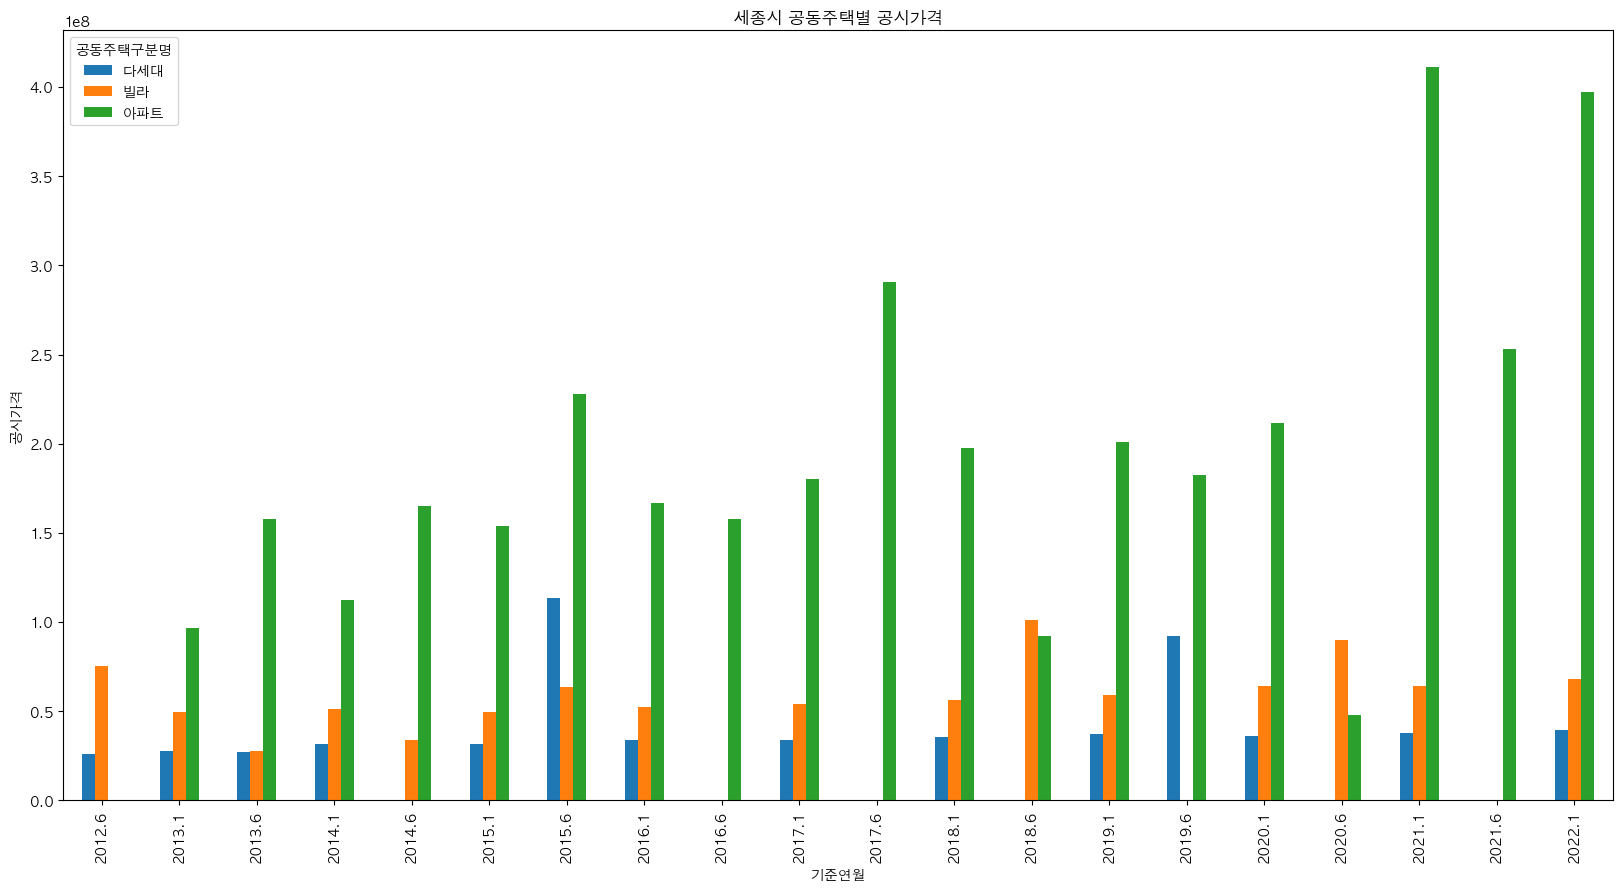

In [35]:
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('csv/세종시.csv', encoding='CP949')
df.drop(
    ['법정동코드', '특수지구분코드', '특수지구분명', '공동주택코드', '특수지명'],
    axis=1,
    inplace=True
)

df['기준연월'] = df['기준연도'].map(str) + '.' + df['기준월'].map(str)

table = pd.pivot_table(df, index='기준연월', columns='공동주택구분명', values='공시가격', aggfunc=np.mean, fill_value=0)

table.plot(kind='bar',figsize=(20,10), title = '세종시 공동주택별 공시가격', xlabel='기준연월', ylabel='공시가격')
plt.show()

if platform.system() == 'Darwin' :
    plt.rc('font', family = 'AppleGothic')
else :
    plt.rc('font', family = 'Malgun Gothic')
